<a href="https://colab.research.google.com/github/ghkdtjdbs/Hands-on-Machine-Learning-Study/blob/main/Chapter2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Chapter2 머신러닝 프로젝트 처음부터 끝까지**

# **머신러닝 프로젝트 진행 단계**
1. 큰 그림 보기
2. 데이터 구하기
3. 데이터로부터 인사이트를 얻기 위해 탐색하고 시각화 하기
4. 머신러닝 알고리즘을 위해 데이터 준비
5. 모델을 선택하고 훈련 시키기
6. 모델을 미세 튜닝하기
7. 솔루션 제시
8. 시스템을 론칭하고, 모니터링하고, 유지 보수 하기

# **2.1 실제 데이터로 작업하기**  
: 캘리포니아 주택가격 데이터셋 사용

**2.2 큰 그림 보기**  

**2.2.1 문제 정의**  
1) 비즈니스의 목적이 정확히 무엇인가?  
2) 모델 훈련에 어떤 지도 방식이 필요한지 결정 (지도, 비지도, 준지도, 자기 지도, 강화 / 분류, 회기... / 배치학습, 온라인 학습)

# **2.2 큰 그림 보기**  

**2.2.1 문제 정의**  
1) 비즈니스의 목적이 정확히 무엇인가?  
2) 모델 훈련에 어떤 지도 방식이 필요한지 결정 (지도, 비지도, 준지도, 자기 지도, 강화 / 분류, 회기... / 배치학습, 온라인 학습)  
이번 예제의 경우  
: 레이블된 훈련 샘플이 있으니 지도 학습, 모델값을 예측해야 하니 회귀 문제  
+ 예측에 사용할 특성이 여러개 = 다중 회귀, 각 구역마다 하나의 값 예측 = 단변량 회귀, 구마다 여러개의 값을 예측한다면 다변량 회귀  

**2.2.2 성능 측정 지표 선택**  
- 회기 문제의 전형적인 성능 지표는 평균 제곱근 오차(RMSE) -> 오차가 커질 수록 이 값도 커짐  
- 근데 경우에 따라서는 평균 절대 오차(MAE)도 사용  
- 둘 다 예측값과 타켓값의 벡터 사이의 거리를 재는 방식  
- RMSE가 MAE보다 조금 더 이상치에 민감 but 이상치가 매우 드물면 RMSE가 잘 맞음  

**2.2.3 가정 검사**  
: 만든 가정을 나열하고 검사 -> 심각한 문제를 일찍 발견하기 위해

# **2.3 데이터 가져오기**  

**2.3.1 구글 코랩을 사용하여 예제 코드 실행하기**  
**2.3.2 코드와 데이터 저장하기**  
**2.3.3 대화식 환경의 편리함과 위험**  
**2.3.4 책의 코드와 노트북의 코드**  
**2.3.5 데이터 다운로드**

In [26]:
from pathlib import Path
import pandas as pd
import tarfile  #tarfile=압축 파일을 열기위한 파이썬의 라이브러리
import urllib.request  #urllib.request=인터넷(URL)에서 파일이나 데이터를 요청해서 받아오는 라이브러리

def load_housing_data():  #def=함수를 정의하겠다
    tarball_path = Path("datasets/housing.tgz")
    if not tarball_path.is_file():
        Path("datasets").mkdir(parents=True, exist_ok=True)  #datasets라는 폴더를 “없으면 만들고, 이미 있으면 그냥 넘어가라”는 뜻
        url = "https://github.com/ageron/data/raw/main/housing.tgz"
        urllib.request.urlretrieve(url, tarball_path)  #인터넷에 있는 파일을 다운로드해서 tarball_path 위치에 그대로 저장하라
        with tarfile.open(tarball_path) as housing_tarball:
            housing_tarball.extractall(path="datasets")
    return pd.read_csv(Path("datasets/housing/housing.csv"))  #파일을 읽어서 그 결과(DataFrame)를 함수의 결과로 돌려주라는 뜻

# 함수 실행 및 데이터 로드
housing = load_housing_data()

In [27]:
housing.info()  #책에는 >>>~인데 >>>는 입력X

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


total_bedrooms 특성은 20,433개의 널값이 아님. 207개의 구역은 이 특성을 가지고 있지 않다는 뜻임  

ocean_proximity 필드만 빼고 모든 특성이 숫자  
->의 데이터 타입은 object이므로 어떤 파이썬 객체도 될 수 있음.  
but CSV파일에서 읽었기 떄문에 텍스트 특성  
  
  처음 다섯 줄을 출력했을 때 ocean_proximitt 열의 값이 반복 -> 아마 범주형이여서  
  어떤카테고리가 있는지, 각 카테고리마다 얼마나 많은 구역이 있는지는 value_counts()매서드로 확인  

In [28]:
housing["ocean_proximity"].value_counts()

,count
ocean_proximity,
<1H OCEAN,9136
INLAND,6551
NEAR OCEAN,2658
NEAR BAY,2290
ISLAND,5


discrube()매서드는 숫자형 특성의 요약정보를 보여줌  

널값은 제외됨  

- std행은 값이 퍼져있는 정도를 측정하는 표준편차를 나타냄  
  

데이터 형태를 히스토그램으로 나타낼 수 있음!

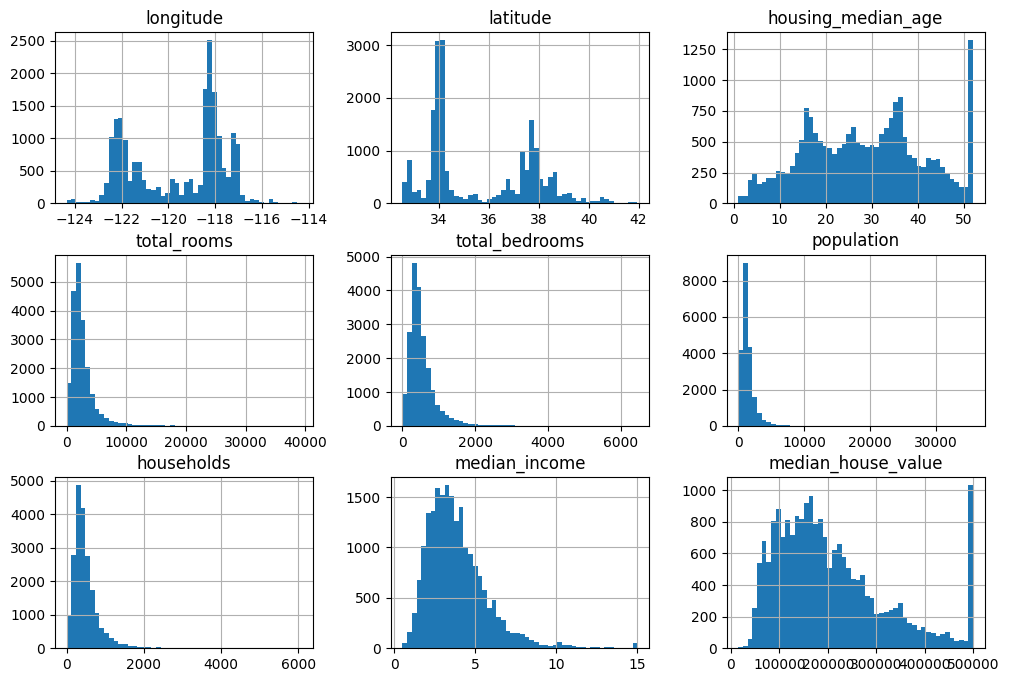

In [29]:
import matplotlib.pyplot as plt

housing.hist(bins=50, figsize=(12, 8))  #hist()매서드로 모든 숫자형에 대한 히스토그램 추출!
plt.show()

데이터를 깊게 들여다보기 전에 테스트 세트를 따로 떼어 놓아야 한다!  
그리고 테스트 세트를 절대 들여다보면 안 됨  
Why? 테스트 데이터를 미리 보면 모델 성능을 과대평가 할 수도 있기 때문!  
(데이터 누수, 무의식적으로 모델을 조정하게 됨, 과적합 때문에) -> 데이터 스누핑

2.3.7 테스트 세트 만들기  
: 랜덤으로 데이터의 약 20%정도 떼어 놓으면 됨

In [30]:
import numpy as np

def shuffle_and_split_data(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))  #shuffled_indices: 무작위로 뒤섞인 데이터의 순서 번호들  #len(data) : 데이터의 총 개수  #permutation : 무작위 배열 생성
    test_set_size = int(len(data) * test_ratio)  #int : 괄호 안의 숫자를 정수 형태로 바꿔라
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]  #iloc데이터가 표의 몇 번째 줄에 있는지 '숫자'로 정확히 찍어서 가져오는 도구

In [31]:
train_set, test_set = shuffle_and_split_data(housing, 0.2)
len(train_set)

len(test_set)

4128

프로그램을 다시 실행하면 다른 테스트 세트가 생성됨  
여러번 계속하면 전제 테이터셋을 보게 되는거기 때문에 그런 일을 없도록 하자  
그에 관한 해결책은 처음 실행에서 테스ㅡ 세트를 저장하고 다음번 실행에서 이를 불러들이는 것  
다른 해결책 : 항상 같은 난수 인덱스가 생성되도록 np.random.permutation()을 호출하기 전에 난수 발생기의 초깃값을 지정하는 것 (예 : np.random.seed(42) )  
: 그니까 난수 발생의 초깃값을 저장하는 것 -> 무작위 섞기를 할 때 매번 똑같은 순서로 섞이도록 고정 하는 것 : 재현성을 높이기 위해!

하지만!!

이 두 해법 다 업데이트 된 데이터 셋을 사용할 떄 문제가 생김  
데이터셋을 업데이트 한 후에도 안정적인 훈련/테스트 분할을 가능하게 하는 일반적인 해결잭은 샘플의 식뱔자를 사용하여 테스트 세트로 보낼지 말지 결정하는 것!

In [32]:
from zlib import crc32  #crc32 32비트 순환 중복 검사->데이터 전송시에 데이터가 손상되지 않았는지 확인하는 오류 검출용 해시 함수
import numpy as np

def is_id_in_test_set(identifier, test_ratio):
    # crc32의 결과를 2^32와 비교하여 일정 비율 이하인 것만 테스트 세트로 분류
    return crc32(np.int64(identifier)) < test_ratio * 2**32

def split_data_with_id_hash(data, test_ratio, id_column):  #id_column : 데이터 프레임 내에서 각 데이터 샘플을 유일하게 식별 할 수 있는 열을 의미
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: is_id_in_test_set(id_, test_ratio))  #lambda는 이름 없는 한 줄 짜리 익명함수
    return data.loc[~in_test_set], data.loc[in_test_set]

# 주택 데이터셋에 식별자 컬럼이 없을 경우 행의 인덱스를 ID로 사용하는 방법
housing_with_id = housing.reset_index()   # 'index' 열이 추가된 데이터프레임이 반환됩니다.
train_set, test_set = split_data_with_id_hash(housing_with_id, 0.2, "index")

주택 데이터셋에는 식별자 칼럼이 없음  
하지만! 행의 인덱스를 ID로 사용하면 간단히 해결된다!

In [33]:
# 1. 행의 인덱스를 ID로 사용하는 방법
housing_with_id = housing.reset_index()   # 'index' 열이 추가된 데이터프레임이 반환
train_set, test_set = split_data_with_id_hash(housing_with_id, 0.2, "index")

# 2. 위도와 경도를 연결하여 고유 ID를 만드는 방법
# 위도와 경도는 수백 년 후까지 안정적인 특성이므로 고유 식별자로 쓰기 적합
housing_with_id["id"] = housing["longitude"] * 1000 + housing["latitude"]
train_set, test_set = split_data_with_id_hash(housing_with_id, 0.2, "id")

사이킷런은 데이터셋을 여러 서브셋으로 나누는 다양한 방법을 제공  
가장 간단한 함수는 train_test_split  
이게 shuffle_and_split_data()와 아주 비슷하지만  
1번 함수는 난수 초깃값을 지정할 수 있는 random_state매개변수가 있음  
그리고 행의 개수가 같은 여러개의 데이터셋을 넘겨서 동일한 ㄴ인덱스를 기반으로 나눌 수 있음 (데이터프레임이 레이블에 따라 여러 개로 나뉘어 있을 때 매우 유용!)

In [34]:
from sklearn.model_selection import train_test_split

# 데이터를 8:2 비율로 훈련 세트와 테스트 세트로 나눔
# random_state=42를 사용하여 실행할 때마다 동일한 분할 결과 보장
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

데이터셋이 충분히 크다면 일반저그로는 괜찮지만 그렇지 않다면 샘플링 편향이 생길 가능성이 큼  
완전 랜덤하더라도 결과가 크게 편향됨

계층적 샘플링 : 모집단의 계층의 분포가 샘플 집단의 계층적 분포와 같아야 함

지금 하고 있는 예시 프로젝트에서  
만약에 중간 소득이 중요하다고 한다면  
테스트 세트가 전체 데이터셋이 있는 여러 소득 카테고리를 잘 대표해야함  
! 중간 소득은 연속적인 숫자형 ! -> 소득에 대한 카테고리 특성을 만들어야 한다.  
- 계층별로 충분한 샘플 수가 있어야 함 : 계층의 중요도를 추정하는데 편향을 생기는 것을 막기 위해  
-> 너무 많은 계층으로 나누면 안 됨, 각 계층이 충분히 커야함

In [35]:
#pd.cut()을 사용해 5개 카테고리 특성을 나눔 (1~5 레이블)
#카테고리당 1.5 범위

housing["income_cat"] = pd.cut(housing["median_income"],
                               bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                               labels=[1, 2, 3, 4, 5])

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49548 (\N{HANGUL SYLLABLE SO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 46301 (\N{HANGUL SYLLABLE DEUG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 52852 (\N{HANGUL SYLLABLE KA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 53580 (\N{HANGUL SYLLABLE TE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44256 (\N{HANGUL SYLLABLE GO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/loc

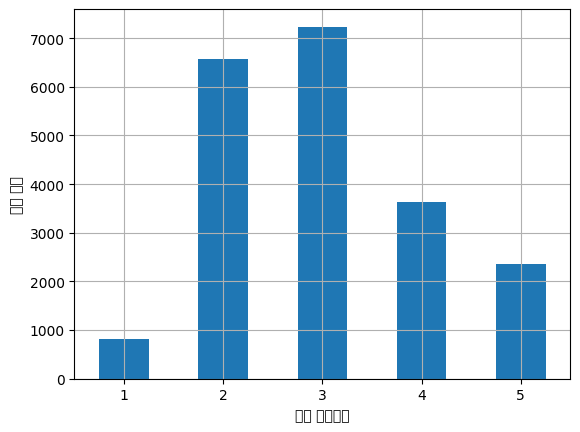

In [36]:
housing["income_cat"].value_counts().sort_index().plot.bar(rot=0, grid=True)  #속에 아무 것도 없는 괄호를 붙이는 이유는 지금 실행하라는 뜻
plt.xlabel("소득 카테고리")
plt.ylabel("구역 개수")
plt.show()

사이킷런은 패키지 안에 여러 분할기 클래스 제공  
분할기는 데이터셋을 훈련 세트와 테스트 세트로 분할하는 다양한 전략을 구현  
모든 분할기는 훈련과 테스트 분할에 대한 반복자를 반환하는 split()을 가지고 있음  
그니까 정확히 말하면 split() 매서드는 훈련과 테스트 데이터 자체가 아니라 인덱스를 반환

In [37]:
from sklearn.model_selection import StratifiedShuffleSplit

# 1. 스플리터 설정 (10개의 분할, 테스트 세트 비율 20%)
splitter = StratifiedShuffleSplit(n_splits=10, test_size=0.2, random_state=42)
strat_splits = []

# 2. 계층별로 데이터를 나누어 리스트에 저장
for train_index, test_index in splitter.split(housing, housing["income_cat"]):
    strat_train_set_n = housing.iloc[train_index]
    strat_test_set_n = housing.iloc[test_index]
    strat_splits.append([strat_train_set_n, strat_test_set_n])

# 3. 첫 번째 분할을 선택하여 최종 훈련/테스트 세트로 사용
strat_train_set, strat_test_set = strat_splits[0]

# housing["income_cat"]을 기준으로 계층적 샘플링 수행
strat_train_set, strat_test_set = train_test_split(
    housing, test_size=0.2, stratify=housing["income_cat"], random_state=42)

In [38]:
strat_test_set["income_cat"].value_counts() / len(strat_test_set)

,count
income_cat,
3,0.350533
2,0.318798
4,0.176357
5,0.114341
1,0.039971


테스트 세트 생성은 교차검증에도 중요함!

2.4 데이터 이해를 위한 탐색과 시각화  
테스트 세트를 떼어놓았는지 확인 하고 훈련 세트에 대해서만 탐색  
훈려 세트가 매우 크다면 탐색 단계에서 조작을 간단하고 빠르게 하기 위해 탐색을 위한 세트를 별도로 샘플링 할 수도 있다.  
이번 예제에서는 훈련 세트의 크기가 작아서 훈련 세트 전체를 사용

In [39]:
#다양한 변환을 할 거기 때문에 혹시 몰라서 데이터의 복사본을 만들자
housing = strat_train_set.copy()

2.4.1 지리적 데이터 시각화 하기

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44221 (\N{HANGUL SYLLABLE GYEONG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50948 (\N{HANGUL SYLLABLE WI}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


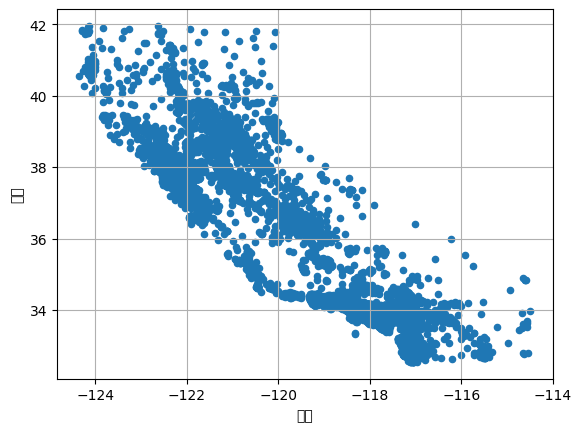

In [40]:
#이 데이터셋에 위도, 경도 있으니 모든 구역을 산점도로 시각화 해보자
housing.plot(kind="scatter", x="longitude", y="latitude", grid=True)
plt.xlabel("경도")
plt.ylabel("위도")
plt.show()

시각화는 했는데 특정한 패턴을 찾기는 힘듦,,,
그래서 alpha옵션을 0.2로 주면 포인트가 밀집된 영역을 볼 수 있음
여기서 alpha옵션은 시각화 해서 불투명도를 조절하는 옵션임 (1은 완전 불투명(기본 값), 0은 완전 투명(안 보임))
-> 산점도에서 점이 너무 많아서 다 겹쳐보일 때 불투명도를 조절하면 많은 부분은 겹쳐서 진해지고, 밀집도가 낮은 부분은 연하게 보임

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44221 (\N{HANGUL SYLLABLE GYEONG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50948 (\N{HANGUL SYLLABLE WI}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


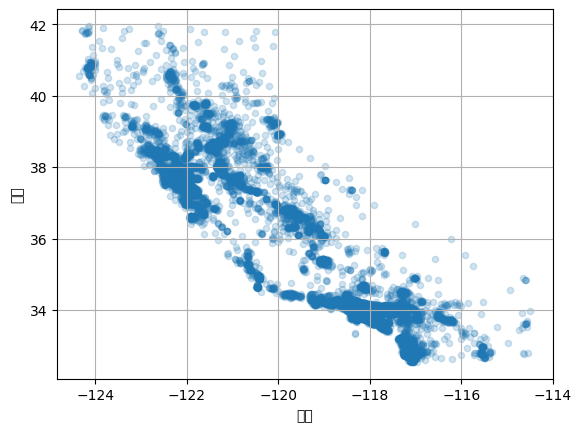

In [41]:
housing.plot(kind="scatter", x="longitude", y="latitude", grid=True, alpha=0.2)
plt.xlabel("경도")
plt.ylabel("위도")
plt.show()

위 그래프를 해석해보면  
베이 에어리어와 로스앤젤레스근처, 샌디에이고같이 밀집된 지역에 눈에 잘 띠고, 센트럴 밸리에 밀집된 긴 띠를 이루고 있음

ValueError: 'c' argument must be a color, a sequence of colors, or a sequence of numbers, not 'median_housing_value'

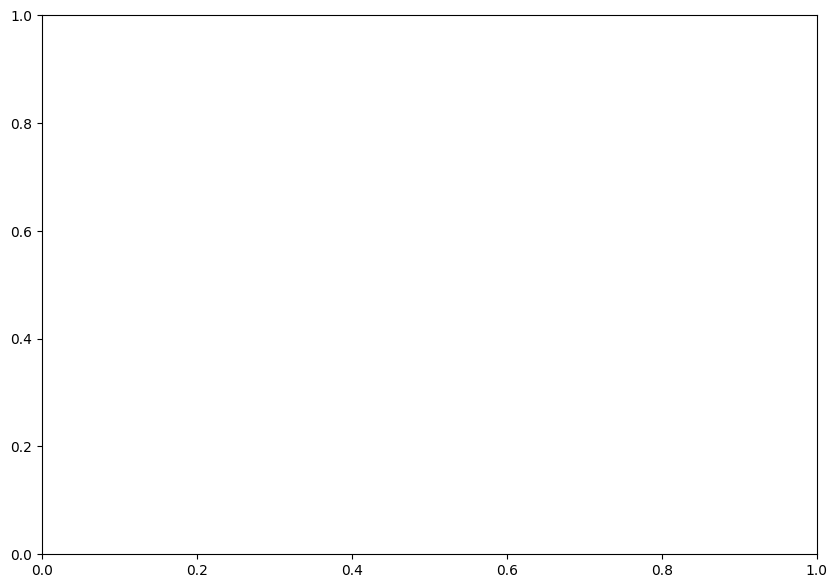

In [42]:
#이제 주택 가구를 나타내 보자!
#원의 반지름은 구역의 인구(s), 색상은 가격(c)(빨간색:높은 가격, 파란색:낮은 가격은 범위를 가지는 jet)

housing.plot(kind="scatter", x="longitude", y="latitude", grid=True,
             s=housing["population"] / 100, label="인구",
             c="median_housing_value", camp="jet", colorbar=True,
             legend=True, figsize=(10, 7))
cax=plt.gcf().get_axes()[1]
cax.set_ylabel("가격", rotation=270, fontsize=18)
plt.xlabel("경도")
plt.ylabel("위도")
plt.show()